
# Project: Investigate TMDb movie dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Movie Database (TMDb) is a community built movie and TV database.This data set contains information about 10,000 movies collected from The Movie Database (TMDb). it includes 10866 rows and 21 columns.Thorugh TMDb dataset investigation different packages are used (pandas, numpy, matplotlib).Through this dataset, Certain columns, like ‘cast’ and ‘genres’, contain multiple
values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Before the analysis of the dataset, data wrangling phase has been conducted to clean the data from unimportant columns, noisy data, and other problems. Before data wrangling phase, general properities about the dataset has been addressed.

### Analysis of the DataSet (questions that is analyized in the dataset):
>1- Information about runtime of the movies 
>
>2- Information about the poulairty and vote average of the movies  
>
>3- Count each genres of movies in the dataset
>
>4- Mean profit for each genere
>
>5- Number of movie releases per year
>
>6- Mean profit for  each release year
>
>7- Total profit for each release year
>
>8- Relationship between revenue and profit
>
>9- Relationship between popularity and vote_count
>
>10- Correlation between budget, revenue, and profit

In [52]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions. We will start with addressing General properities about the dataset.

### General Properties

In [53]:
# Load csv file named tmdb-movies.csv' into data frame DF
df = pd.read_csv('tmdb-movies.csv')

# dimensions of DF
print("Dimensions of DF: ", df.shape)

# print Information of DF
print("\nInformation about DF: ")
print(df.info())

# First fifth rows of DF
print("\nHead of DF: \n", df.head(5))

Dimensions of DF:  (10866, 21)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_comp

### Data Cleaning
Data cleaning is the process of fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset. 
Thorugh data cleaning phase, data wrangling has been conducted for modifying the data into a more usable form.

#### Problems With the dataset
>**1**: Remove unused Columns imdb_id (there is id column for each movie), budget_adj, revenue_adj (the last two columns show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.)
>
>**2**: Remove duplication in the rows (check and process if  exist)
>
>**3**: Remove rows contains noisy data (Some movies has 'zero' budget or revenue. So, we need to discard it)
>
>**4**: Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)
>
>**5**: Modify the datatype of relase_date column to the correct datatype (from string into date)


###### 1- Remove unused Columns which are imdb_id, budget_adj and, revenue_adj
Three columns has been deleted from the DF. First one is 'imdb_id'as there is id column for each movie. The second and Third columns are 'budget_adj' and 'revenue_adj' as the columns show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [54]:
# drop Columns ()
df.drop(['imdb_id', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

#print Columns after removing the three columns
print(df.columns.tolist())

['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']


###### 2- Remove duplication in the rows (check and process if exist)

In [55]:
# Number of rows (in advance)
print("Current Number of rows", df.shape[0])
# check Rows Duplication
duplicated_rows = sum(df.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)
if(duplicated_rows):
    df.drop_duplicates(keep ='first', inplace=True)
print("New Number of rows after Removing duplication", df.shape[0])

Current Number of rows 10866
Number of Duplicated rows:  1
New Number of rows after Removing duplication 10865


From the above check, there exist one row duplication. We apply remove duplication from the dataset.  

###### 3- Remove rows contains noisy data (Some movies has 'zero' budget or revenue. So, we need to discard it)

In [56]:
# drop rows where value of a 'budget' column is zero
df.drop(df.index[df['budget'] == 0], inplace = True)

# drop rows where value of a 'revenue' column is zero
df.drop(df.index[df['revenue'] == 0], inplace = True)

# Number of Rows after removing rows contains zero value in 'budget' and 'revenue' columns
print("Number of rows after removing noisy data: ", df.shape[0])

Number of rows after removing noisy data:  3854


Number of Rows in the dataset after removing nosiy data are '3854'

###### 4- Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)

In [57]:
# Display all information about columns on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   int64  
 3   revenue               3854 non-null   int64  
 4   original_title        3854 non-null   object 
 5   cast                  3850 non-null   object 
 6   homepage              1426 non-null   object 
 7   director              3853 non-null   object 
 8   tagline               3574 non-null   object 
 9   keywords              3716 non-null   object 
 10  overview              3854 non-null   object 
 11  runtime               3854 non-null   int64  
 12  genres                3854 non-null   object 
 13  production_companies  3808 non-null   object 
 14  release_date          3854 non-null   object 
 15  vote_count          

Using info function on DF, there exist 5 cloumns contains NN values which are:
cast, home page, director, tagline, keywords, production_companies 

There is no need for Modifying NN to a value as all are data not filled and has no impact on our analysis (from my point of view). 

###### 5- Modify the datatype of 'relase_date' column to the correct datatype (from string into date)

In [58]:
# convert the 'release_date' column to datetime format
df['release_date']= pd.to_datetime(df['release_date'])
 
# Check the format of 'release_date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   int64         
 3   revenue               3854 non-null   int64         
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   homepage              1426 non-null   object        
 7   director              3853 non-null   object        
 8   tagline               3574 non-null   object        
 9   keywords              3716 non-null   object        
 10  overview              3854 non-null   object        
 11  runtime               3854 non-null   int64         
 12  genres                3854 non-null   object        
 13  production_compan

<a id='eda'></a>
## Exploratory Data Analysis



#### There is a need for a profit coulumn to be used in EDA phase. (profit = revenue - budget)

In [59]:
# compute profit as revenue minus budegt
profit = df['revenue'] - df['budget']
# insert profit column as the third column in Df (insert function acts on zero indexing of columns)
df.insert(5,'profit',profit)

#display 5 rows of the dataset
df.head(5)

,id,popularity,budget,revenue,original_title,profit,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,1363528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,228436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,185238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,1868178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,1316249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


#### Descriptive statistics about DF

In [60]:
#descriptive statistics
df.describe()

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000,2015.000000


From the above result, we get some important insights: 
>1- minimum runtime = 15, average = 109, and maximum = 338
>
>2- minimum vote_average = 2.2, average = 6.2, and maximum = 8.4
>
>3- for profit, Maximum profit exceeds 2 billion dollar and average is about 70 million dollar , there exist a movies that losses money

Conduct distribution about runtime of the movies for more details

### Research Question 1: Information about the runtime of the movies 
univerate analysis (runtime) as 1D variable

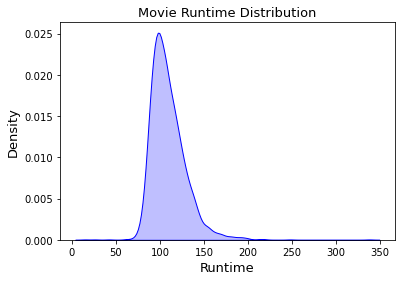

In [61]:
# Use Kdeplot for displying the distribution of runtime column 
sn.kdeplot(df.runtime, color='blue', shade='True');
#x-axis 
plt.xlabel('Runtime', fontsize = 13)
#y-axis 
plt.ylabel('Density', fontsize=13)
#title of the graph
plt.title('Movie Runtime Distribution', fontsize=13)

# show plot
plt.show()

From the above KDEplot : The minimum runtime value is 15, Average runtime is about '109', Maximum runtime is '338'.  The plot is righ skew. Most movies exceeds the average runtime.

### Research Question 2: Information about the populairty and vote average of the movies 
it is an example of single-variable (1d) explorations (populairty variable as alone . vote_average as alone variable) and draw colcusion from them

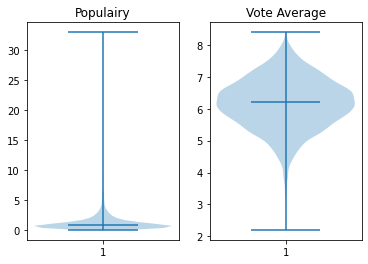

In [62]:
# we use violin plot graph for displying the distripuion of a values in column, besides it displays the mean and if there is outlier 
# Create figure with two variables (popularity and vote_average)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2);

# Plot violin plot on axes 1
ax1.violinplot(df.popularity, showmedians=True)
ax1.set_title('Populairy')
ax1.set_xticks([1])

# Plot violin plot on axes 2
ax2.violinplot(df.vote_average, showmedians=True)
ax2.set_title('Vote Average')
ax2.set_xticks([1])


plt.show()

From the above graph, we get some important insights from the distribution of populairy and distribution of vote_average.vote_average is right skew .it seems to have no outlier. popularity seems to have outliers (as shown from maximum value of the violin plot) from the distribution. popularity is left skew .the vote_average column in the dataset is more expressive about the movies more than popularity.

### Research Question 3: Count each genres of movies in the dataset

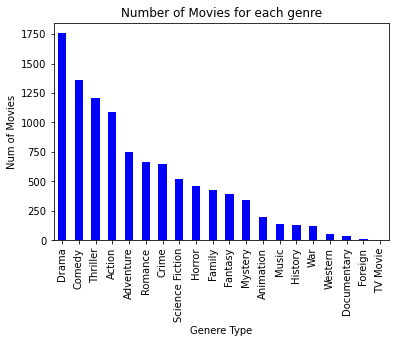

In [63]:
# compute count of each type of movie generes are in the datset
# create a new dataframe with splitting values in genres colum 
genres_df = df.assign(genres_=df['genres'].str.split('|')).explode('genres_')
# count each type of a value in the new DF column names "genres_"
genres_df['genres_'].value_counts().plot(kind='bar', color='blue', title='Number of Movies for each genre'
                                         , xlabel='Genere Type', ylabel='Num of Movies');

From the above graph:Drama and Comedy has the highest genere type. 

### Research Question 4: Mean profit for each genres 

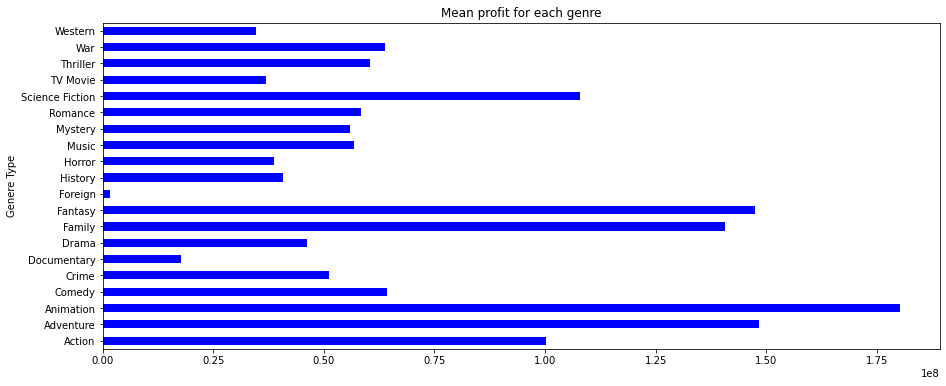

In [64]:
# profit for each geners_type (movies'profit may be related one or more genre)
gb = genres_df.groupby('genres_')['profit'].mean()

gb.plot(kind='barh', color='blue', title='Mean profit for each genre'
        , xlabel='Genere Type', ylabel='Profit',figsize=(15,6));

From the above, movies of type action, fantasy and adventure achieve the better profit. 

### Research Question 5: Number of movie releases per year

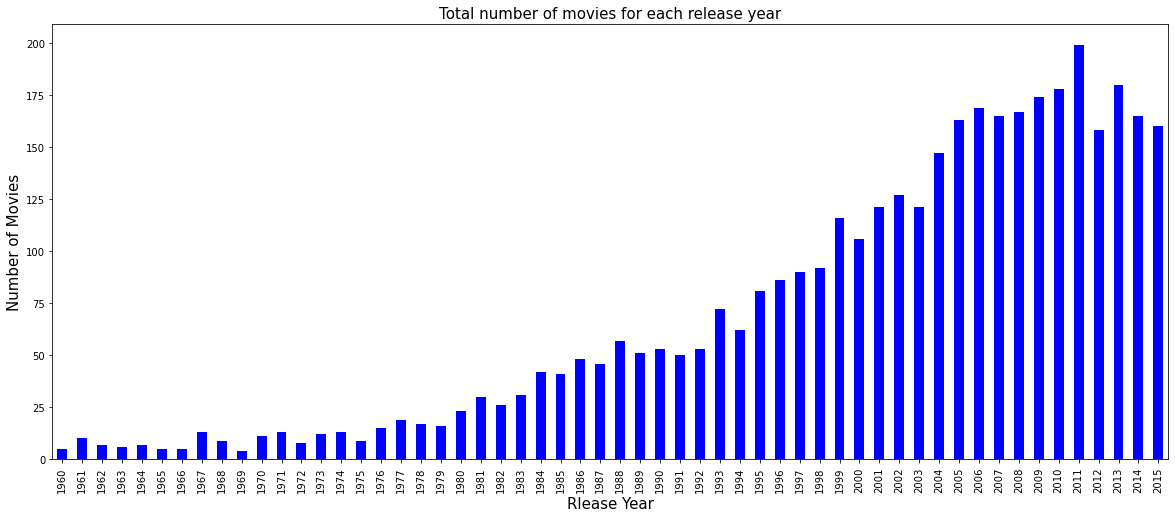

In [65]:
# plot bar graph for counts of a movie for each year. sort_index function is used for sorting labels of years on x-axis
df['release_year'].value_counts().sort_index().plot(kind='bar',figsize=(20,8), color = 'blue');
plt.xlabel('Rlease Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Total number of movies for each release year', fontsize=15)
#displays the plot
plt.show()

From the above bar graph: year '2012' is the year of most movie release with '200' movie. release year of the movies starts from 1960 to 2015. 

### Research Question 6: Mean profit for  each release year

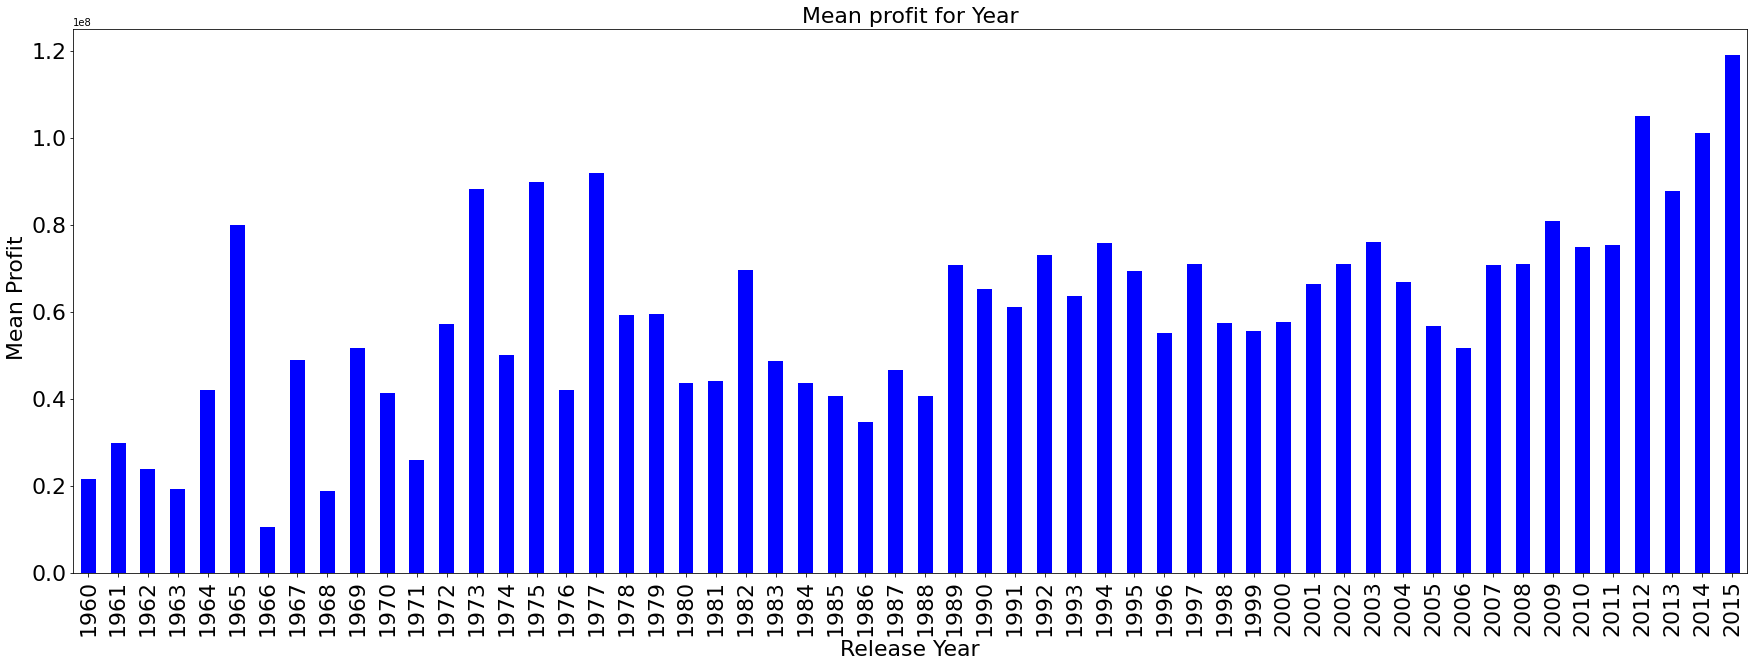

In [66]:
# define function for plotting a kind of graph takes two vectores - decide operation(mean or sum)
def plot(graph, xvec, yvec, xlabel, ylabel, title, op):
    if op == 0: # compute sum
        gb = df.groupby(xvec)[yvec].sum()
    elif op == 1: # compute mean
        gb = df.groupby(xvec)[yvec].mean()
        
    #start plotting the graph 
    ax = gb.sort_index().plot(kind=graph,figsize=(30,10), color="blue", fontsize=22);
    # title 
    ax.set_title(title,fontsize=22)
    #xlabel
    ax.set_xlabel(xlabel , fontsize=22);
    #ylabel
    ax.set_ylabel(ylabel, fontsize=22);
    # display the plot
    plt.show()
#Display mean profit grouped by release year 
plot('bar', 'release_year', 'profit', 'Release Year',' Mean Profit', 'Mean profit for Year' , 1)


From the above bar graph: year '2015' has the largest mean profit with nearly '120 million dolar'. Mean profit ranges from 20 million dollar to 120 million dolar. 

### Research Question 7:Total profit for  each release year

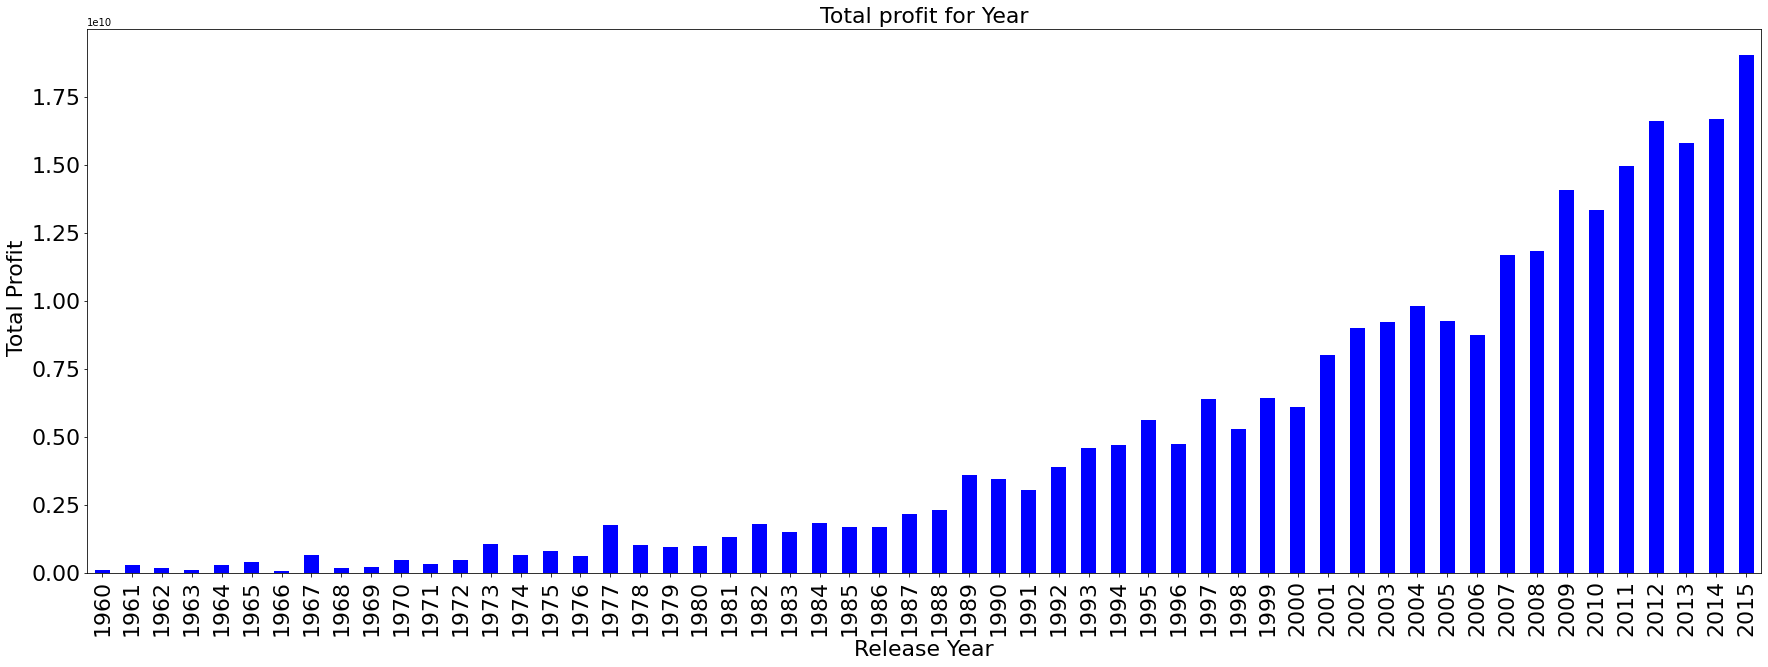

In [67]:
#Display total profit grouped by release year 

# call function for plotting
plot('bar', 'release_year', 'profit', 'Release Year',' Total Profit', 'Total profit for Year' , 0)

From the above bar graph: year '2015' has the maximum total profit (income from the movies) with nearly '200 million dolar'. 

### Research Question 8: Relationship between revenue and profit

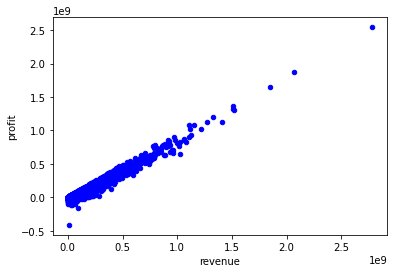

In [68]:
df.plot(x= 'revenue', y= 'profit' , kind='scatter', color = 'blue');

From the above bar graph: there is a strong positive relationship between revenue and profit. if the revenue of a movie increases the profit increases. 

### Research Question 9: Relationship between popularity and vote_count

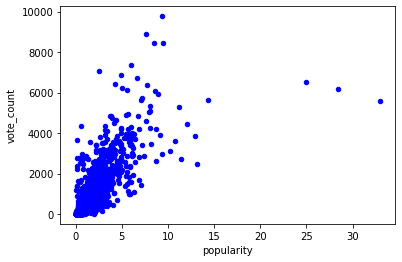

In [99]:
df.plot(x= 'popularity', y= 'vote_count' , kind='scatter', color = 'blue');

From the above bar graph: there is a positive relationship between populairty and vote_count. 

### Research Question 10: Correlation between budget, revenue, and profit

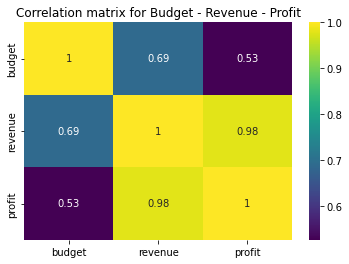

In [98]:
# construct df_ from three columns of the DF (budget, revenue, and profit)
df_ = df[['budget','revenue', 'profit']]
# compute correlation using pearson correlation cofficient
corr_mat=df_.corr(method='pearson')

#draw the heatmap
sn.heatmap(corr_mat, cmap='viridis' , annot = True)
#set title
plt.title("Correlation matrix for Budget - Revenue - Profit")
# show plot
plt.show()

From the above Heatmap: There is a positive correlation between three variables: budget, revenue, and profit. correlation is computed for each two variable: There is strong positive correlation between budget and revenue. besides there is a string positive correlation between revenue and profit (0.98). in addition there is a positive correlation between budget and revenue. 

<a id='conclusions'></a>
## Conclusions

This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.

After the Exploratort Data Analysis we can conclude that:
>1- minimum runtime = 15, average runtime = 109, and maximum runtime= 338
>
>2- minimum vote_average = 2.2, average vote_average = 6.2, and maximum vote_average = 8.4
>
>3- for profit, Maximum profit exceeds 2 billion dollar and average is about 70 million dollar
>
>4- most movie runtime exceeds 109 
>
>5- vote_average is more expressive than popularity (popularity contains outliers)
>
>6- Drama and Comedy genere movies are the most remarkable type.
>
>7- movies of type action, fantasy and adventure achieve the better profit.
>
>8- The maximum release year for a movie 2012, with about 200 movie.
>
>9- The profit from movies in 2015 is the maximum profit with larger than 200 million dollar.
>
>10- Ther is a strong positive relation between revenue and profit.
>
>11- There is a positive correlation between popularity and vote_count
>
>12- there is a strong correlation between budget, revenue, and profit. (revenue and profit has the tight string positive correlation)

Some limitations are exist in this dataset which are:
>1- Not Null values, Noisy data, Incorrect datatypes. This all are processed in Data Cleaning phase  
>
>2- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. This can be processed using text processing for tokenizing the values with  pipe (|) chaaracter. After that we can extract alot of useful information like the best type genres of movies that obtains maximum profit. besides, the best caset through cast cloumn.  